# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Régression linéaire</div></b>

In [5]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    # plt.style.use('seaborn-poster')
sns.set(font_scale=3)
np.random.seed(123456789)

In [6]:
taille_echantillon = 100
X = 2 * np.random.rand(taille_echantillon, 1)
y = 4 + 3 * X + np.random.randn(taille_echantillon, 1)

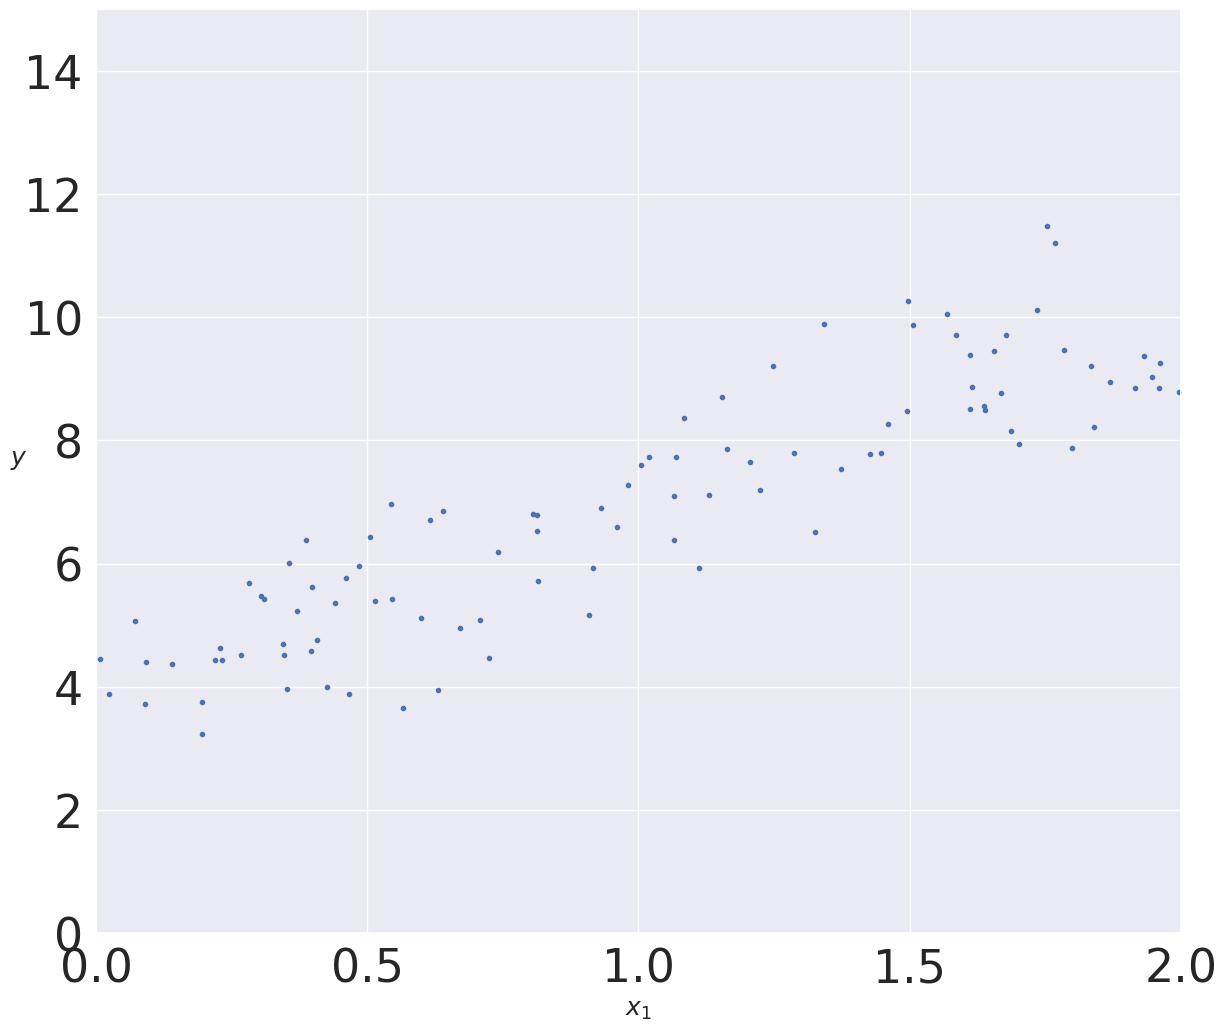

In [7]:
plt.figure(figsize=(14,12))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Régression linéaire -- lmplot</div></b>

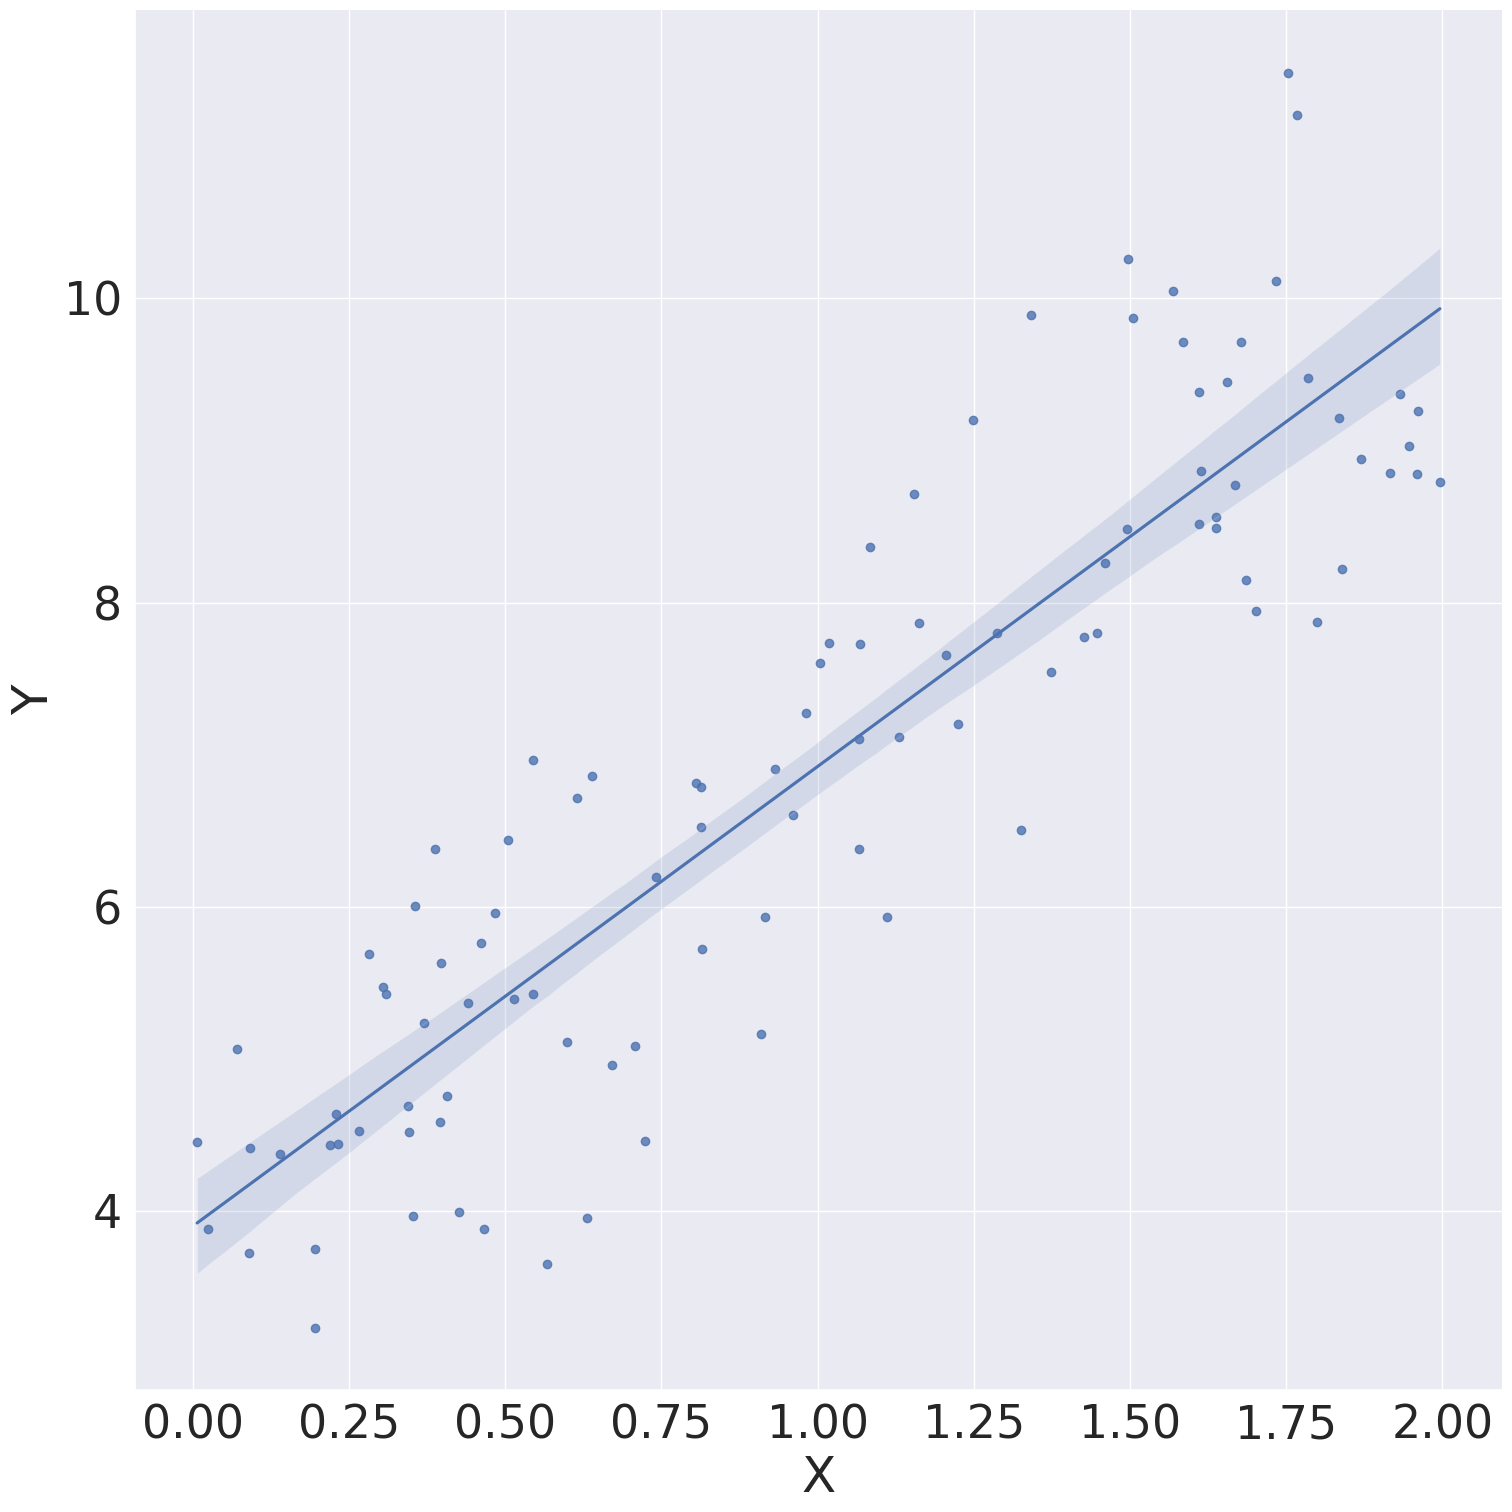

In [8]:
import seaborn as sns
sns.lmplot(x="X", y="Y", data=pd.DataFrame({'X':X[:,0],'Y':y[:,0]}), height =16);

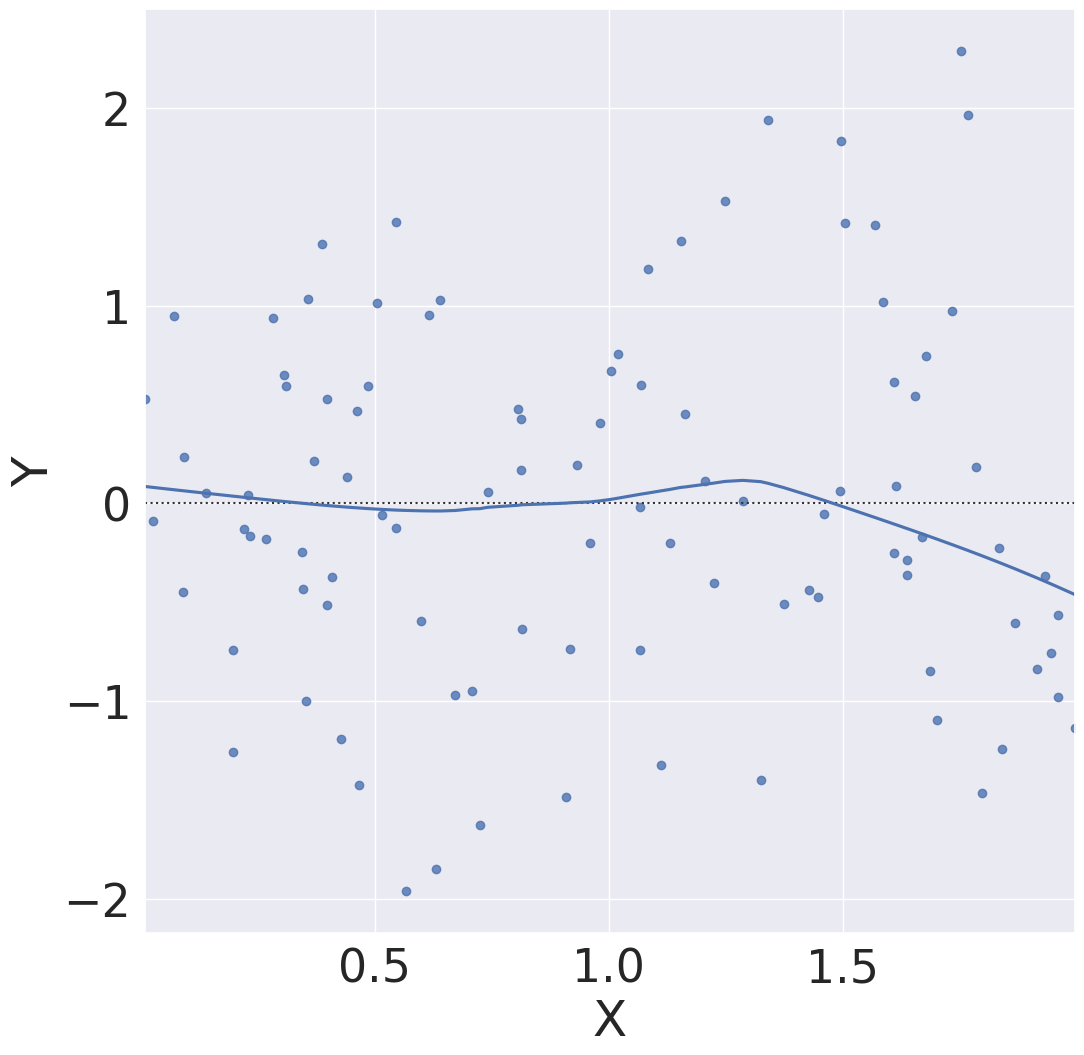

In [9]:
plt.figure(figsize=(12,12))
sns.residplot(x="X", y="Y", data=pd.DataFrame({'X':X[:,0],'Y':y[:,0]}), lowess=True);

Le but de la régression linéaire est de trouver une fonction linéaire $f: \mathbb{R}^{p} \rightarrow \mathbb{R}$ qui permette de prédire l'étiquette $y^{(i)}$ du i-ème point à partir du vecteur  $x^{(i)}$.

$f(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_p x_p$

Comment trouver les valeurs des coefficients $\theta_0,\theta_1,\theta_2, \dots ,\theta_p x_p$

Calculons maintenant $\theta$ à l’aide de l’équation normale. Nous allons utiliser la fonction **inv()** du module d’algèbre linéaire **np.linalg** de **NumPy** pour l’inversion de matrice, et la méthode **dot()** pour les produits matriciels


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Équations algèbre linaire</div></b>

$\theta = {( X^T X )}^{-1} X^T y $


In [10]:
t0 = time.time()        
X_b = np.c_[np.ones((taille_echantillon, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
t1 = time.time()        
print('Exécution  :'+('%.5fs' % (t1 - t0)).lstrip('0'))

Exécution  :.00045s


In [11]:
t0 = time.time()        
X_b = np.c_[np.ones((taille_echantillon, 1)), X]  # add x0 = 1 to each instance
theta_best = (np.linalg.inv(X_b.T @ X_b) @ X_b.T) @ y 
t1 = time.time()        
print('Exécution  :'+('%.5fs' % (t1 - t0)).lstrip('0'))

Exécution  :.00011s


In [12]:
theta_best

array([[3.89849254],
       [3.02315181]])

Maintenant nous pouvons faire des prédictions à l’aide de $\theta$

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.89849254],
       [9.94479615]])

In [14]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[3.89849254],
       [9.94479615]])

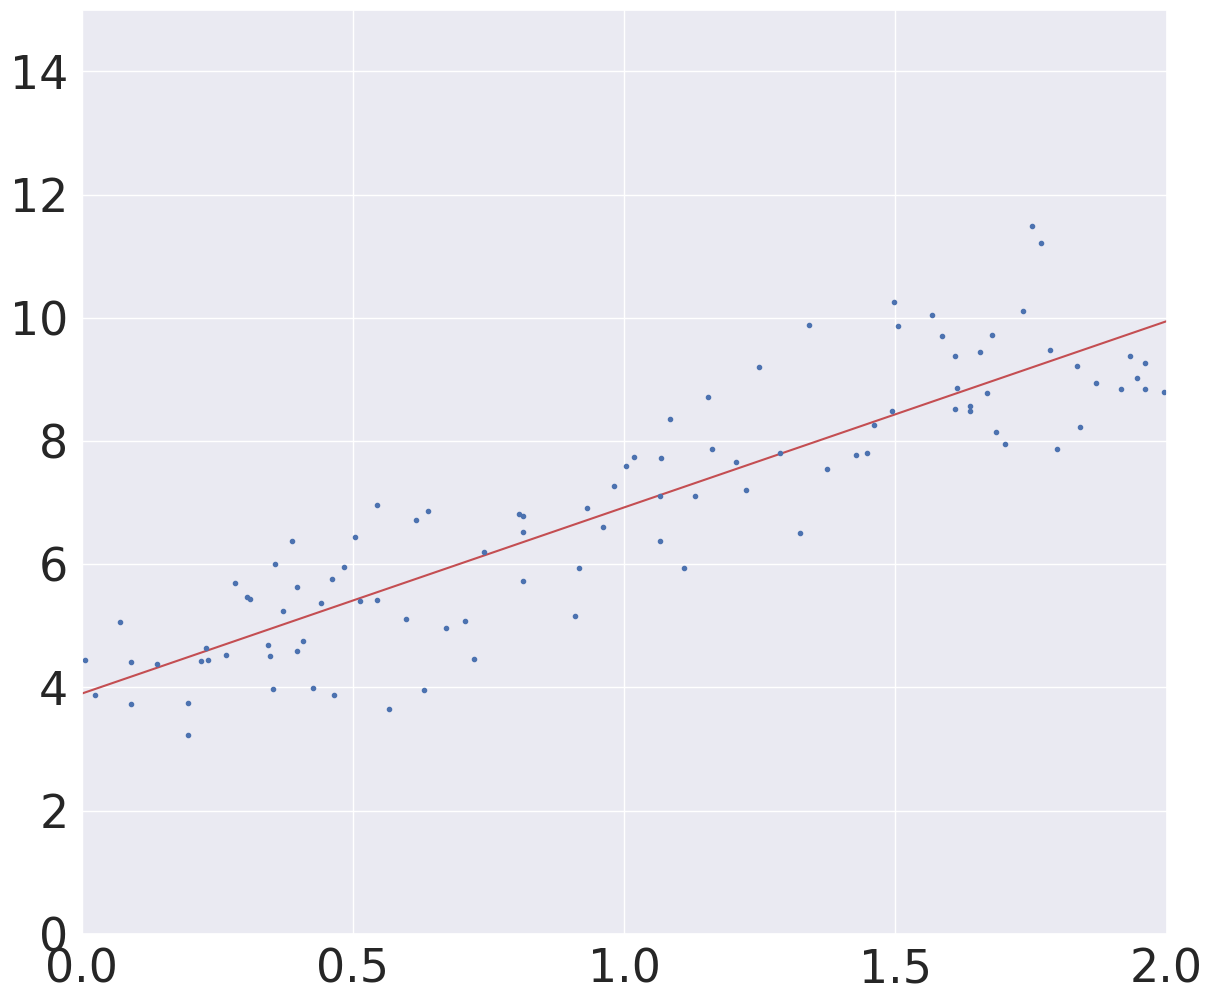

In [15]:
plt.figure(figsize=(14,12))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
X_new = np.array([[0],[0.5],[1],[1.5], [2]])
X_new_b = np.c_[np.ones((5, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.89849254],
       [5.41006844],
       [6.92164435],
       [8.43322025],
       [9.94479615]])

In [17]:
X_new = np.array([[0],[0.5],[1],[1.5], [2]])
X_new_b = np.c_[np.ones((5, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[3.89849254],
       [5.41006844],
       [6.92164435],
       [8.43322025],
       [9.94479615]])

In [18]:
y_new = 4 + 3 * X_new + np.random.randn(5, 1)

In [19]:
m = len(X_new)
cost = 1/(2*m) * ((y_predict - y_new).T @ (y_predict - y_new))
cost

array([[0.3834135]])

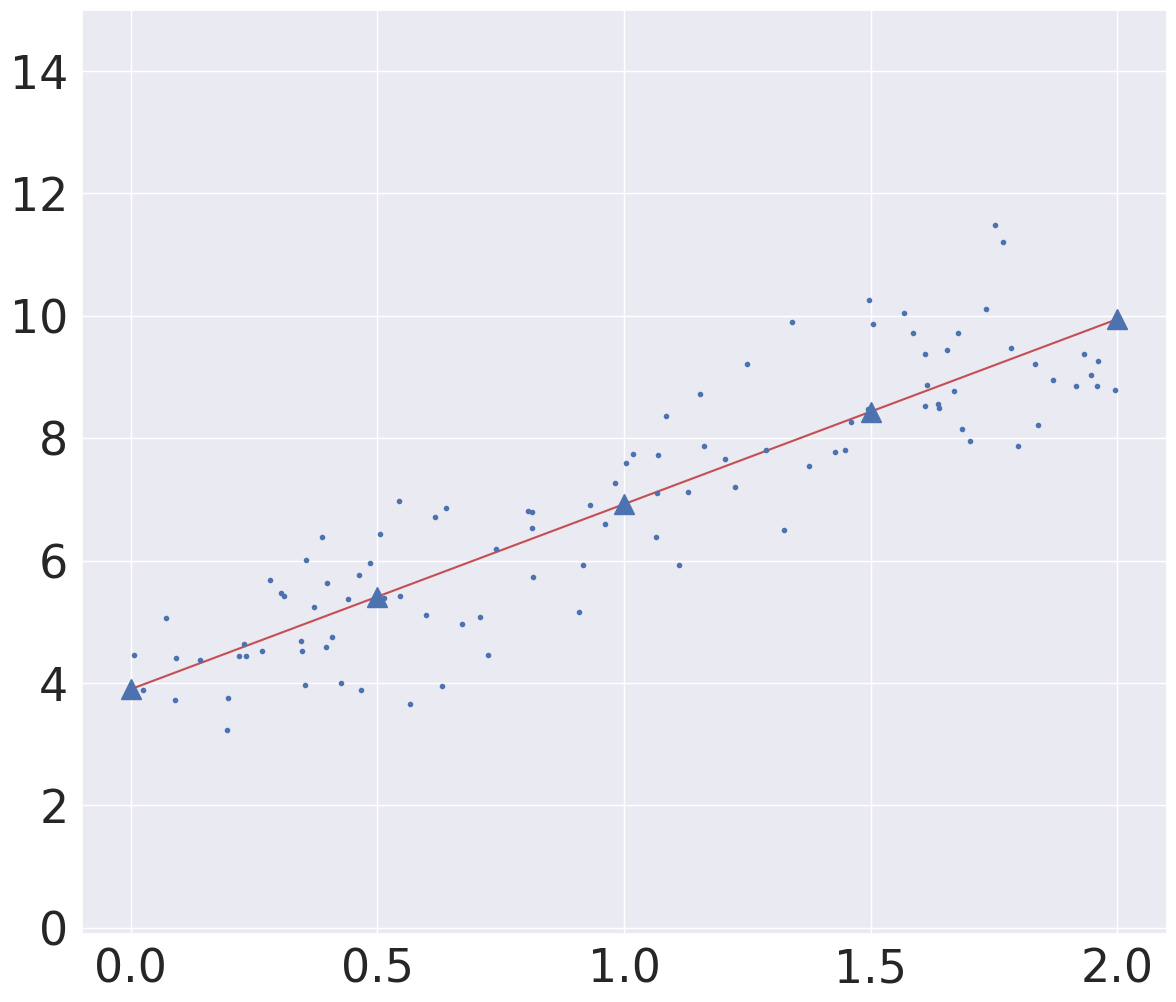

In [20]:
plt.figure(figsize=(14,12))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "b^", ms= 15)
plt.axis([-0.1, 2.1, -0.1, 15])
plt.show()

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Régression Linéaire</div></b>

Voici le code équivalent lorsqu’on utilise **Scikit-Learn**

L’équation normale calcule l’inverse de $X^{T} ⋅ X$, qui est une matrice $(n + 1) × (n + 1)$ (où n est le nombre de variables). La complexité algorithmique d’une inversion de matrice de taille n × n se situe entre $O(n^{2,4})$ et $O(n^{3})$, selon l’algorithme d’inversion utilisé. Autrement dit, si vous doublez le nombre de variables, le temps de calcul est grosso modo multiplié par un facteur compris entre $2^{2,4} = 5,3$ et $2^{3} = 8$.

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.89849254]), array([[3.02315181]]))

In [22]:
y_pred = lin_reg.predict(X_new)

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Choix de la métrique de performance</div></b>

### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Erreur moyenne absolute</div></b>

$MAE = \frac{1}{n} \sum_{i=1}^n \left| y_i - f(x_i)\right|$

In [23]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y, lin_reg.predict(X))

0.5972744807375574

### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Erreur quadratique moyenne(mean absolute error)</div></b>

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i-f(x_i))^2$

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, lin_reg.predict(X))

0.7229815998763827

### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Racine quarrée de l'erreur quadratique moyenne(mean squared error)</div></b>

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-f(x_i))^2}$

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lin_reg.predict(X))

0.811574310338646


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Erreur logarithmique quadratique moyenne(mean squared logarithmic error)</div></b>


$RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(y_i+1) - \log(f(x_i)+1))^2}$

In [26]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y, lin_reg.predict(X))

0.014390184904419926

### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>$R^{2}$ coefficient de détermination linéaire de Pearson</div></b>

$RSE = \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$ avec $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$  

$R = \frac{\sum_{i=1}^n (y_i - \bar y) (f(x_i) - \overline{f(x)})}{\sqrt{\sum_{i=1}^n (y_i - \bar y)^2} \sqrt{\sum_{i=1}^n (f(x_i) - \overline{f(x)})^2 }}$

In [27]:
from sklearn.metrics import r2_score
print(r2_score(y, lin_reg.predict(X)))
print(r2_score(y, lin_reg.predict(X), multioutput='variance_weighted'))
print(r2_score(y, lin_reg.predict(X), multioutput='uniform_average'))
print(r2_score(y, lin_reg.predict(X), multioutput='raw_values'))
print(np.sqrt(r2_score(y, lin_reg.predict(X))))

0.7973538050171647
0.7973538050171647
0.7973538050171647
[0.79735381]
0.8929466977469398


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Descente de gradient</div></b>

In [28]:
def gradientDescent(X, y, theta, eta, n_iterations, costList, thetaList0, thetaList1):
    plt.figure(figsize=(14,12))
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
    m = len(X_b)
    plt.plot(X, y, "b.");
    for iteration in range(n_iterations):
        y_predict = X_b @ theta
        style = "b-" if iteration > 0 else "r--"
        style = "g-" if iteration == n_iterations - 1 else style
        plt.plot(X, y_predict, style)
            
        cost = 1/(2*m) * (((X_b @ theta) - y).T @ ((X_b @ theta) - y))
        costList.append(cost.ravel()[0])
        gradients = 2/m * (X_b.T @ ((X_b @ theta) - y))
        # print(gradients)
        theta = theta - eta * gradients
        thetaList0.append(theta.ravel()[0])
        thetaList1.append(theta.ravel()[1])
    plt.xlabel("$x_1$", fontsize=18);
    plt.axis([0, 2, -1, 15]);
    plt.title(r"$\eta = {}$".format(eta), fontsize=16);
    
    
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    
    plt.plot(X, lin_reg.predict(X), "r-");

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Descente de gradient $\eta=0.01$ itterations 10</div></b>

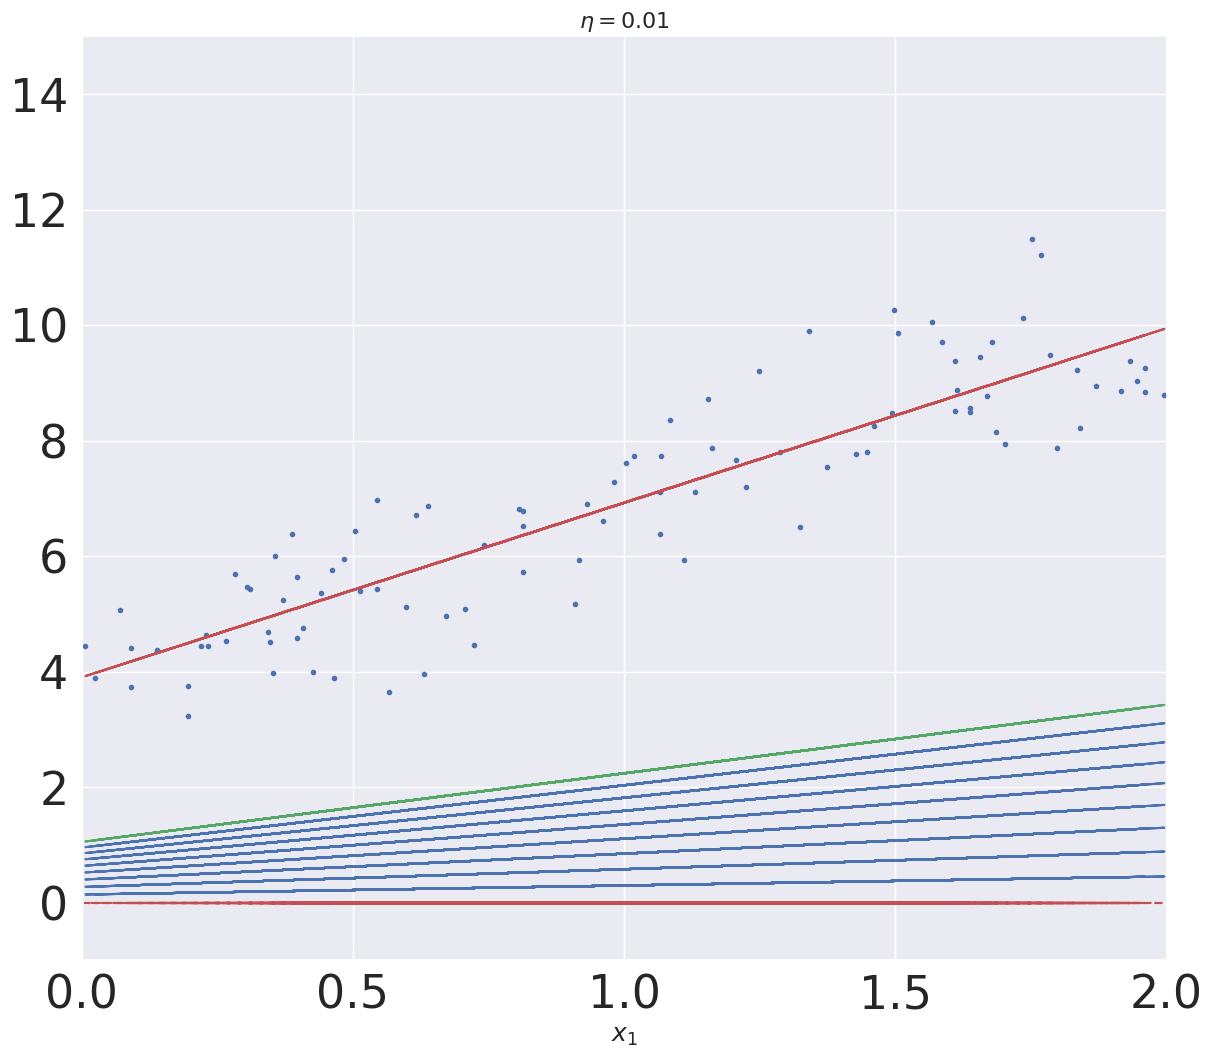

In [25]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = np.array([[0],
       [0]]), eta = 0.01, n_iterations = 10, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1);

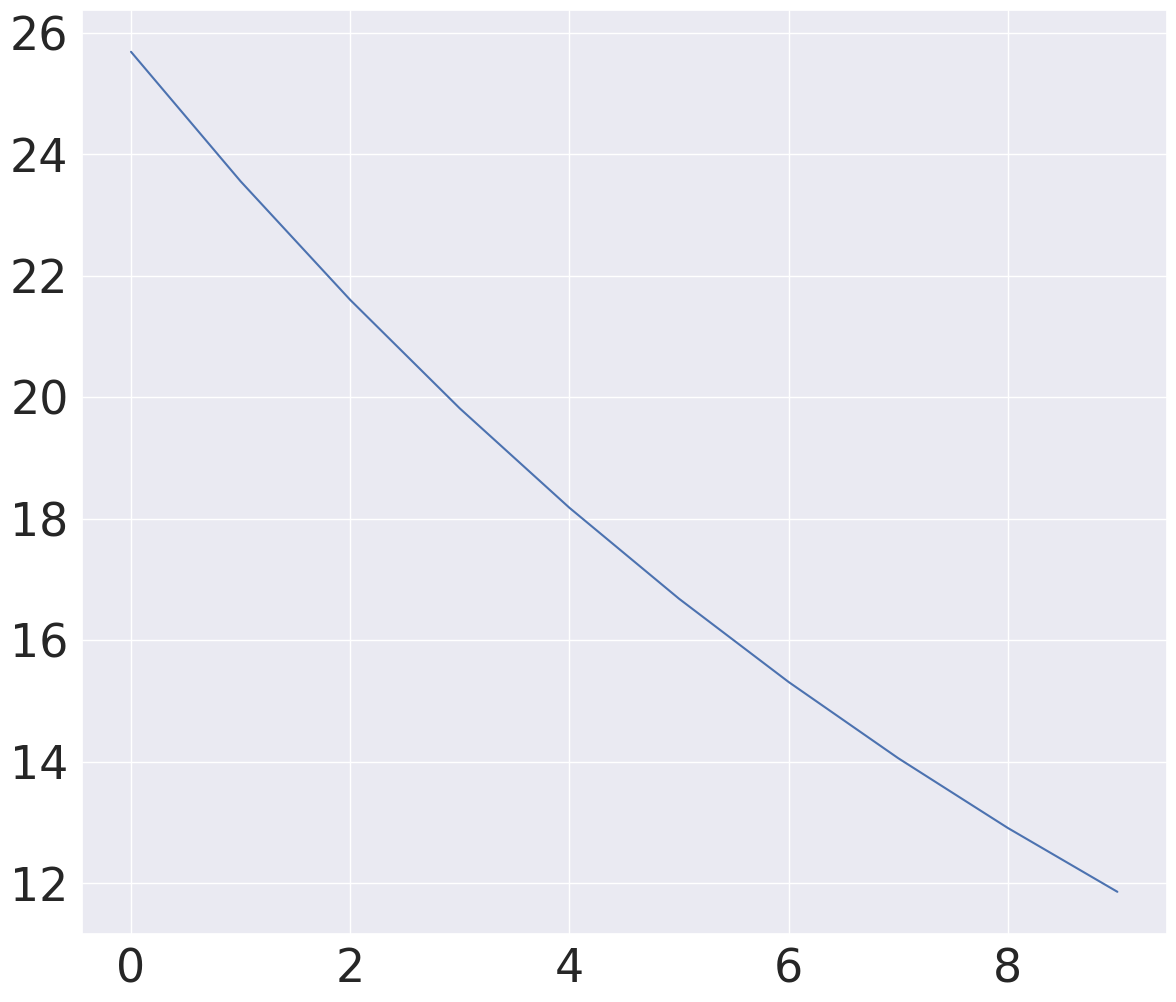

In [26]:
plt.figure(figsize=(14,12))
plt.plot(costList);

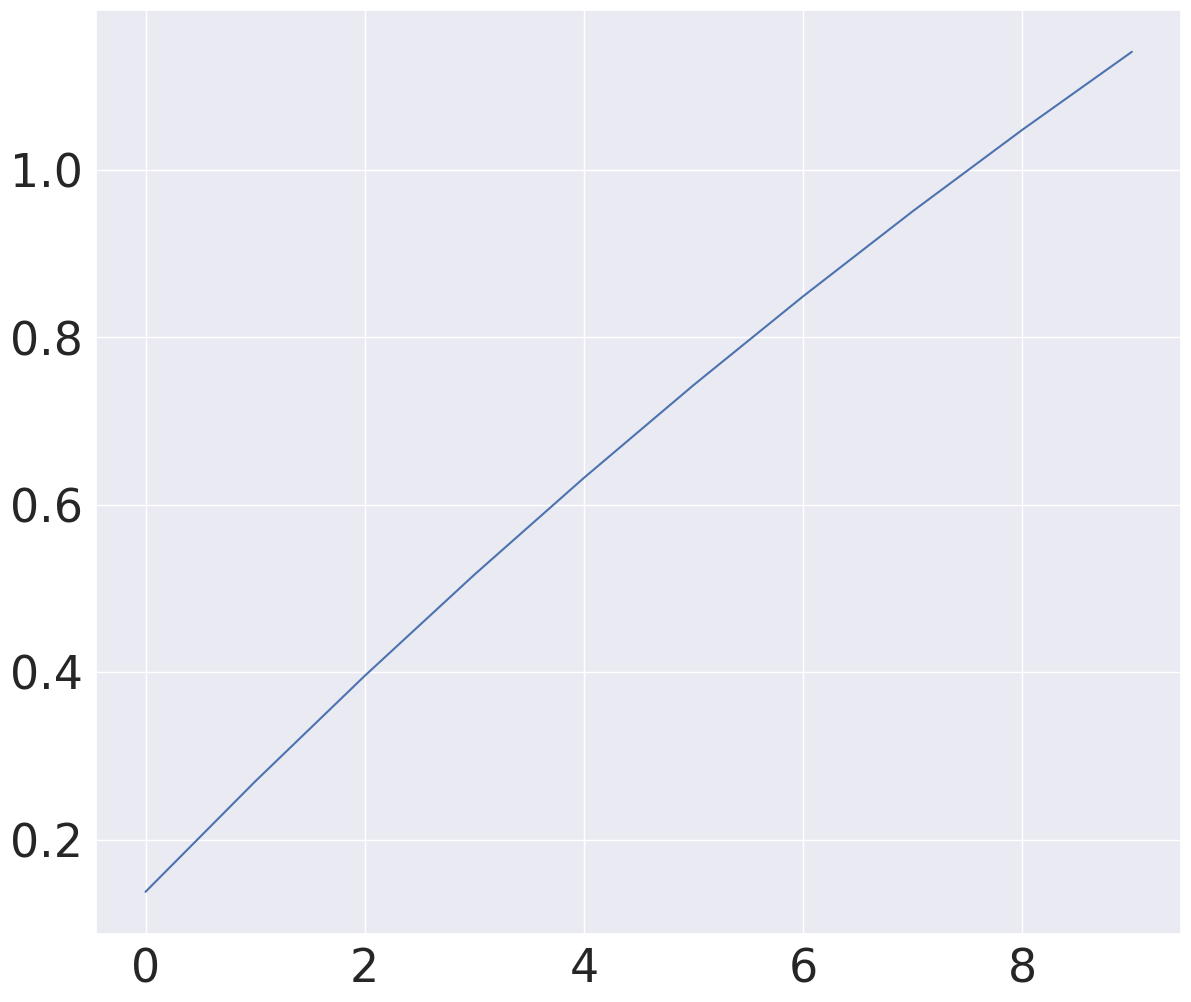

In [27]:
plt.figure(figsize=(14,12))
plt.plot(thetaList0);

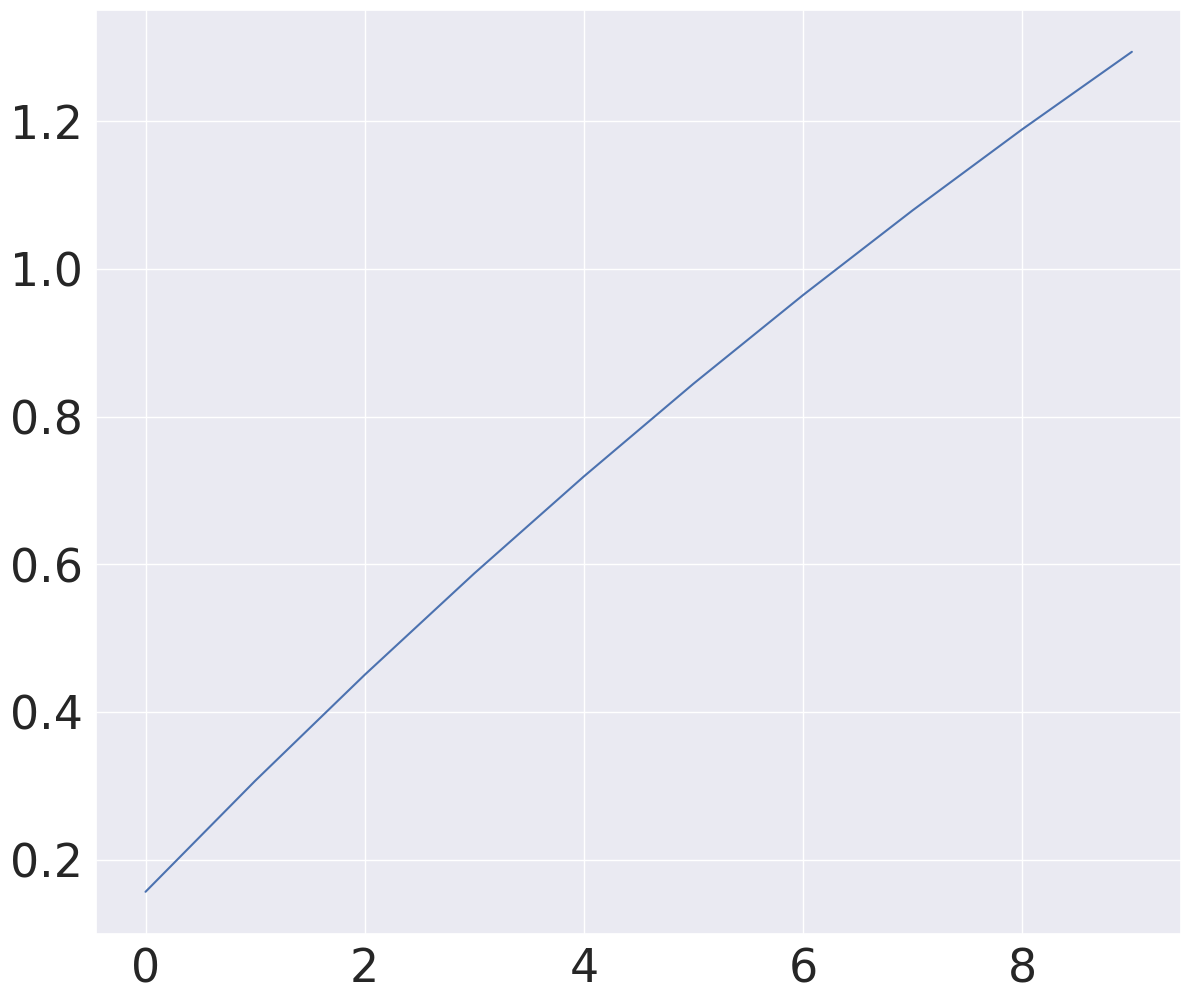

In [28]:
plt.figure(figsize=(14,12))
plt.plot(thetaList1);

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Descente de gradient $\eta=0.01$ itterations 100</div></b>

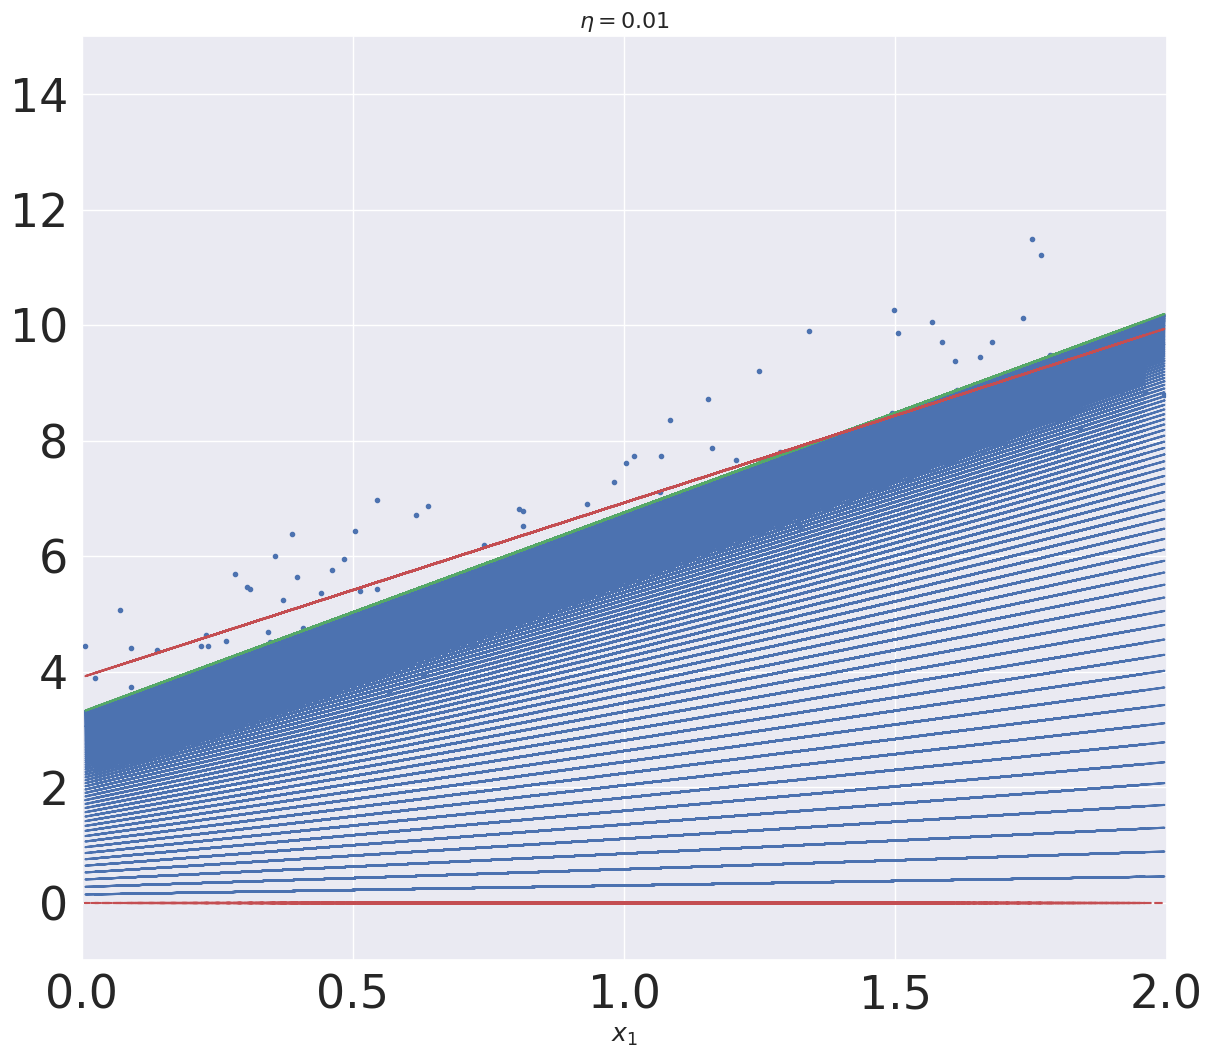

In [29]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = np.array([[0],
       [0]]), eta = 0.01, n_iterations = 100, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1)

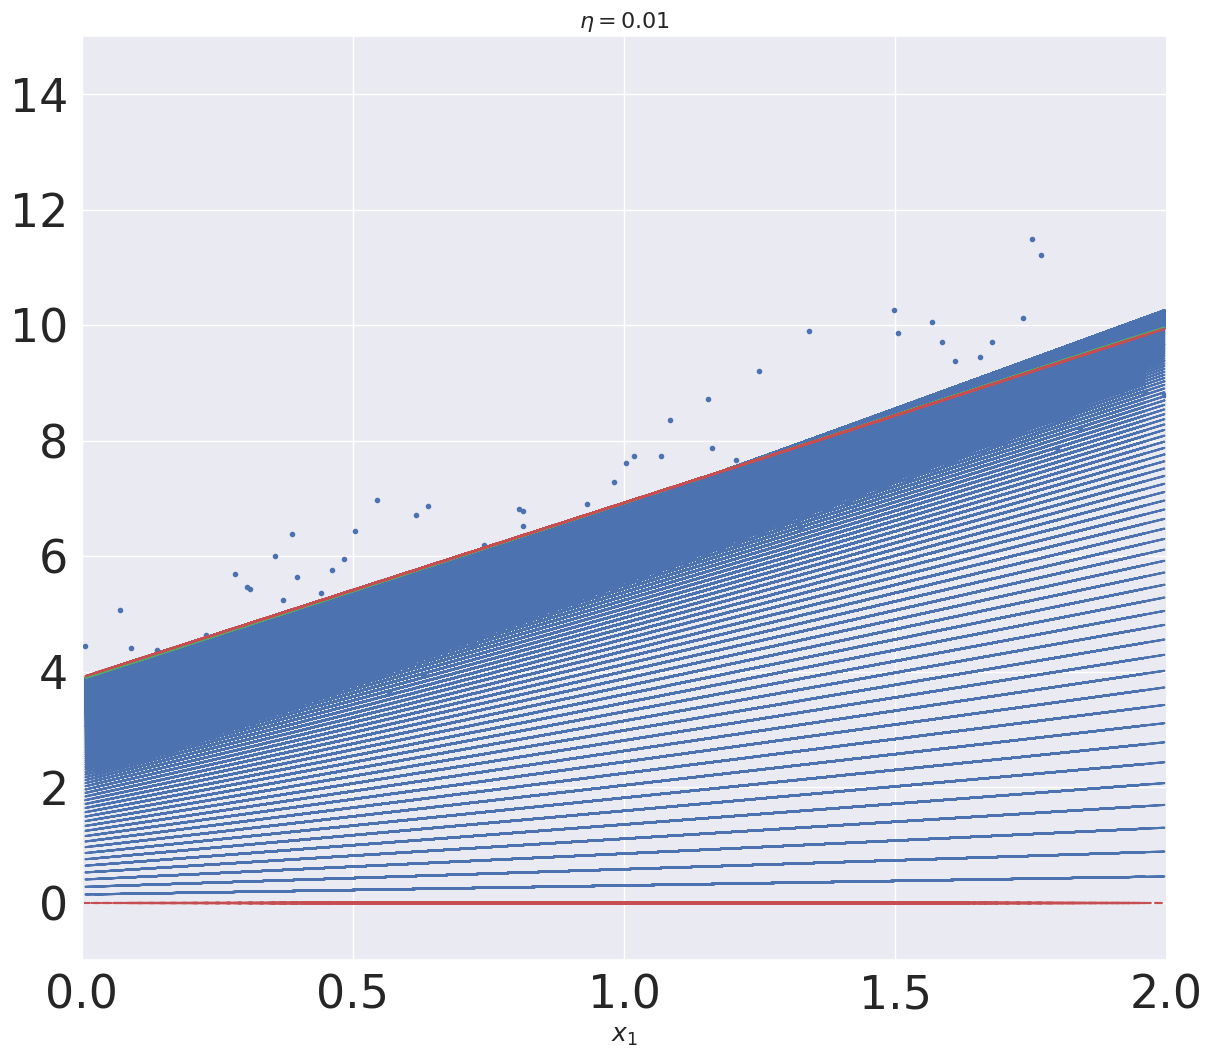

In [30]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = np.array([[0],
       [0]]), eta = 0.01, n_iterations = 1000, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1)

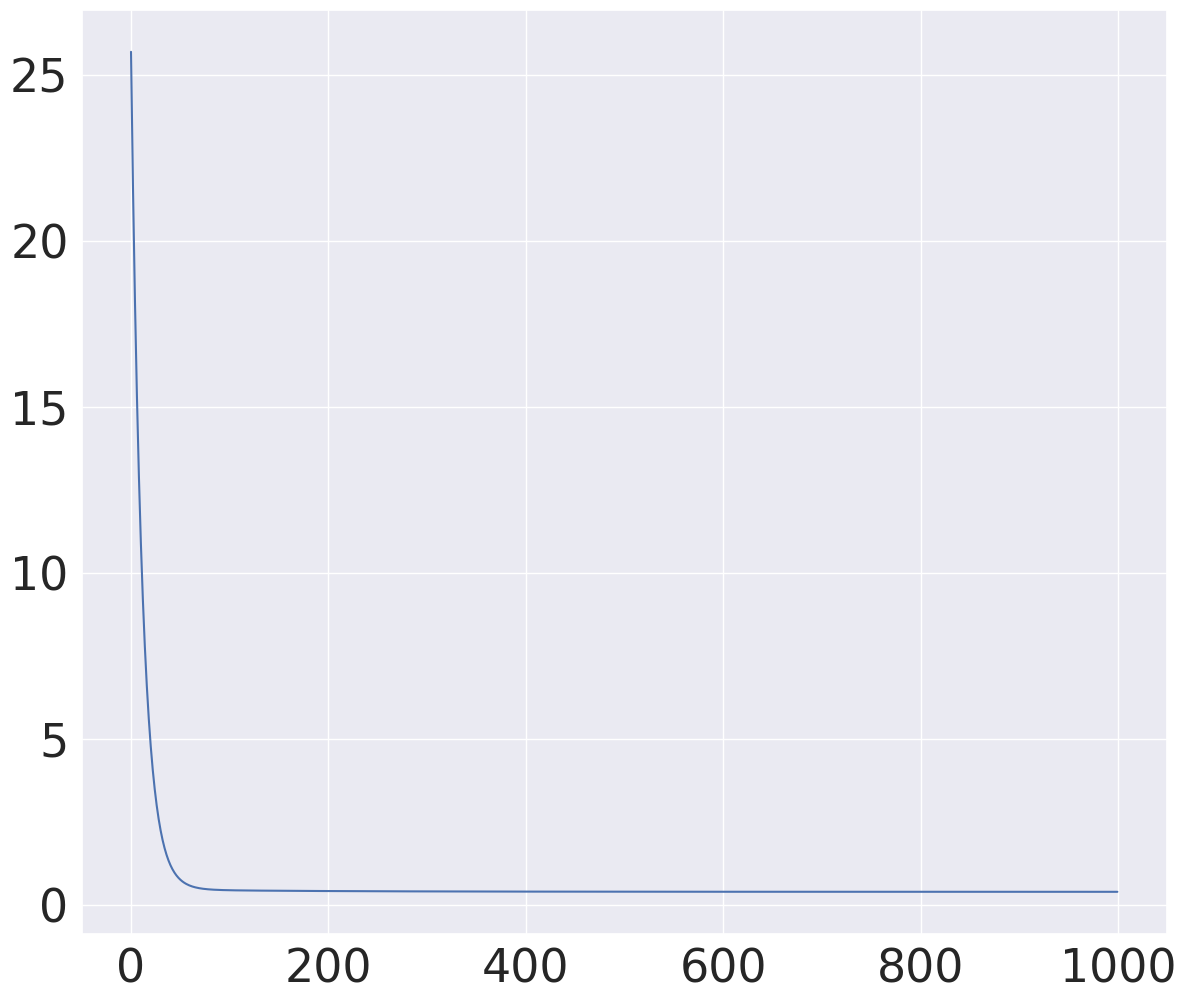

In [31]:
plt.figure(figsize=(14,12))
plt.plot(costList);

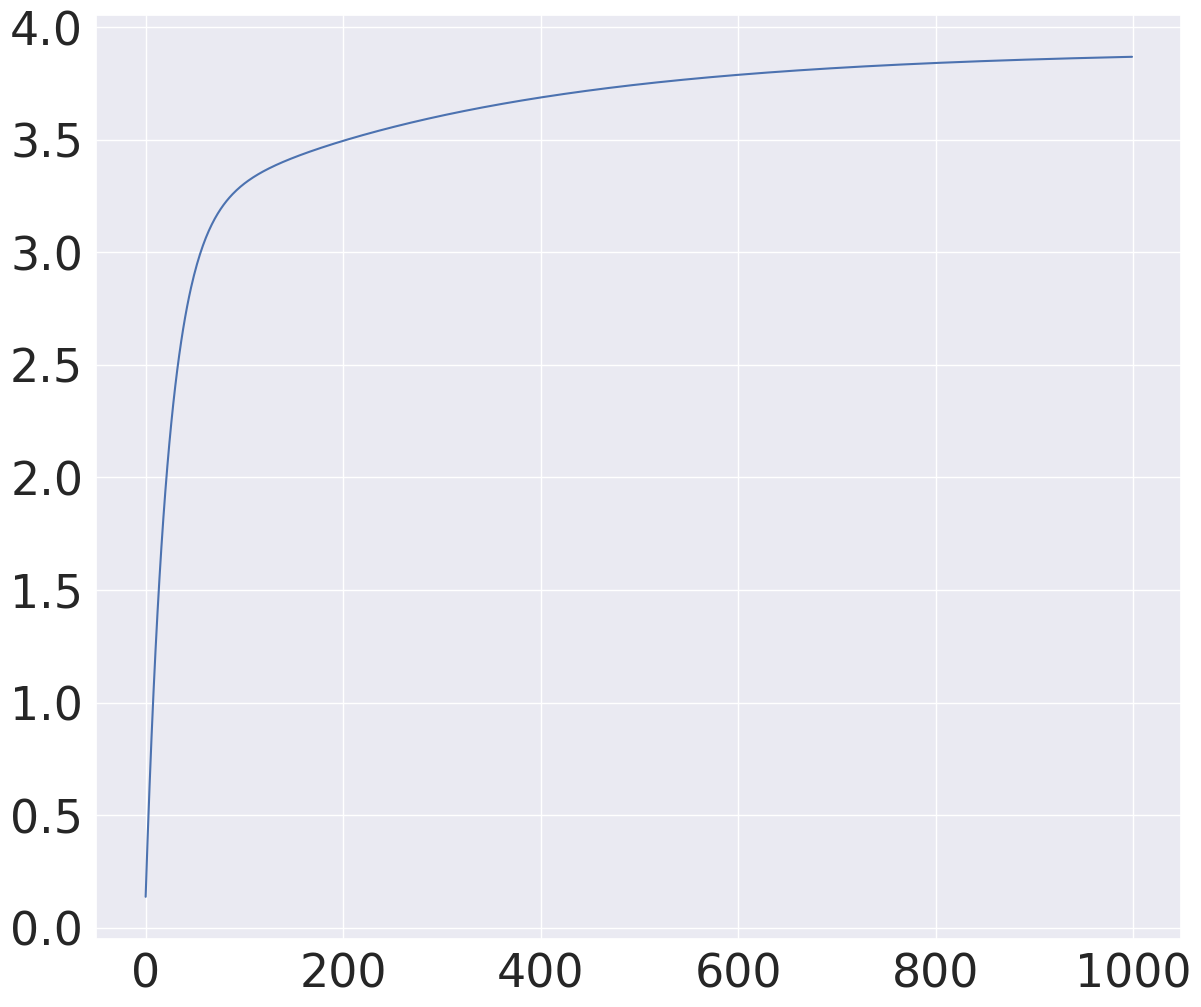

In [32]:
plt.figure(figsize=(14,12))
plt.plot(thetaList0);

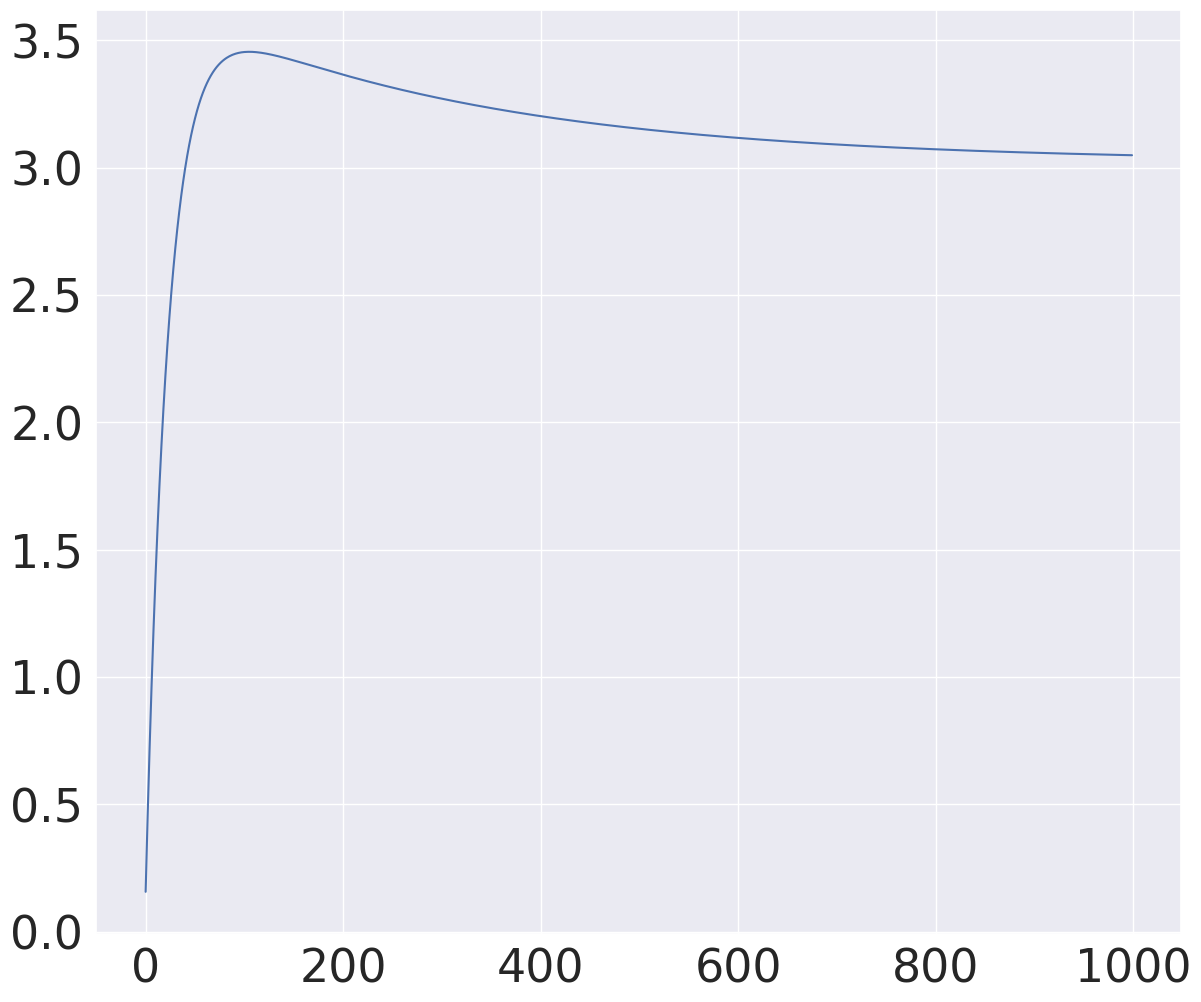

In [33]:
plt.figure(figsize=(14,12))
plt.plot(thetaList1);

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Descente de gradient $\eta=0.01$ itterations 5000</div></b>

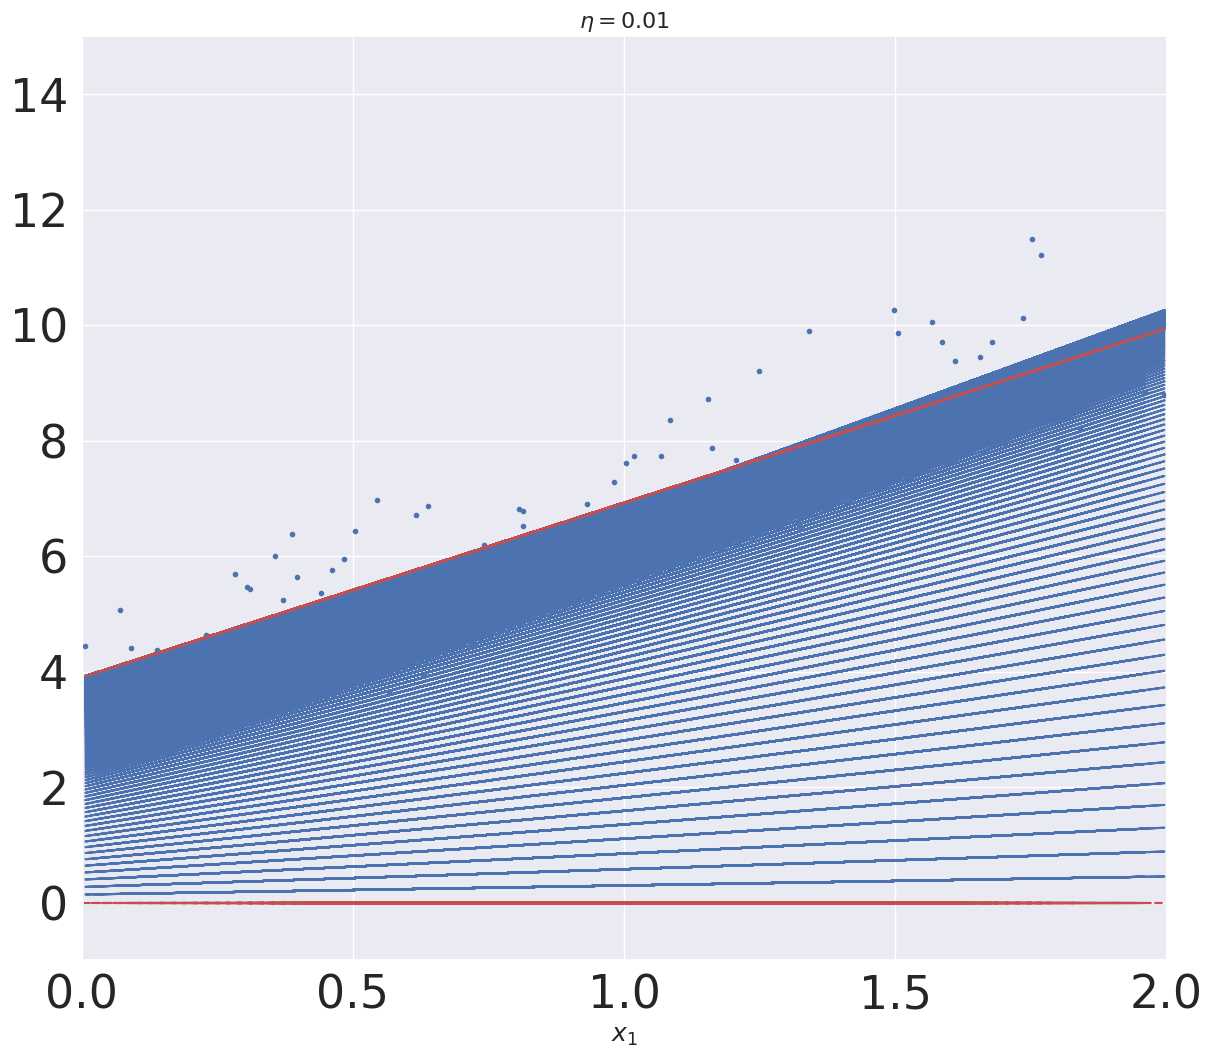

In [34]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = np.array([[0],
       [0]]), eta = 0.01, n_iterations = 5000, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1)

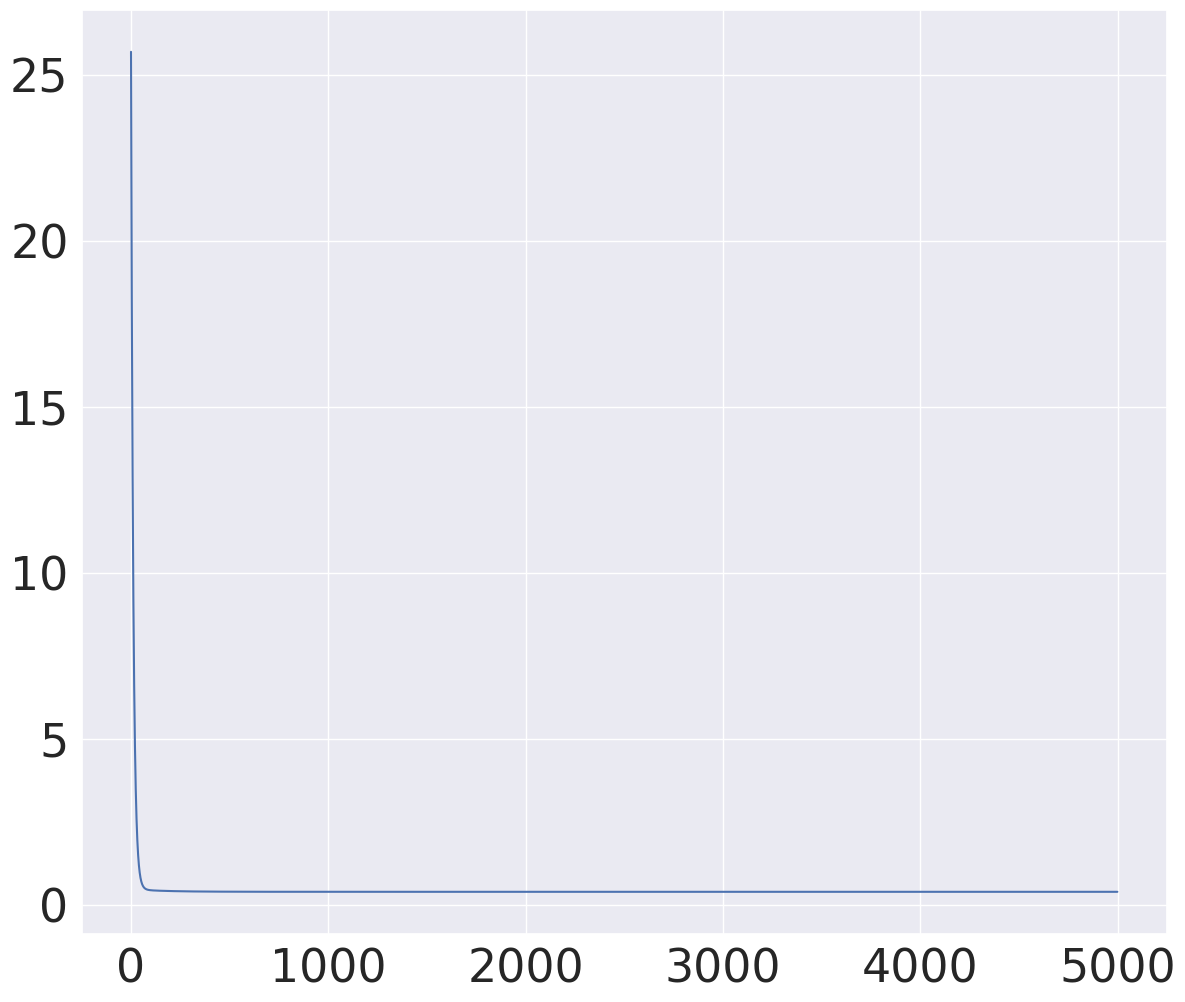

In [35]:
plt.figure(figsize=(14,12))
plt.plot(costList);

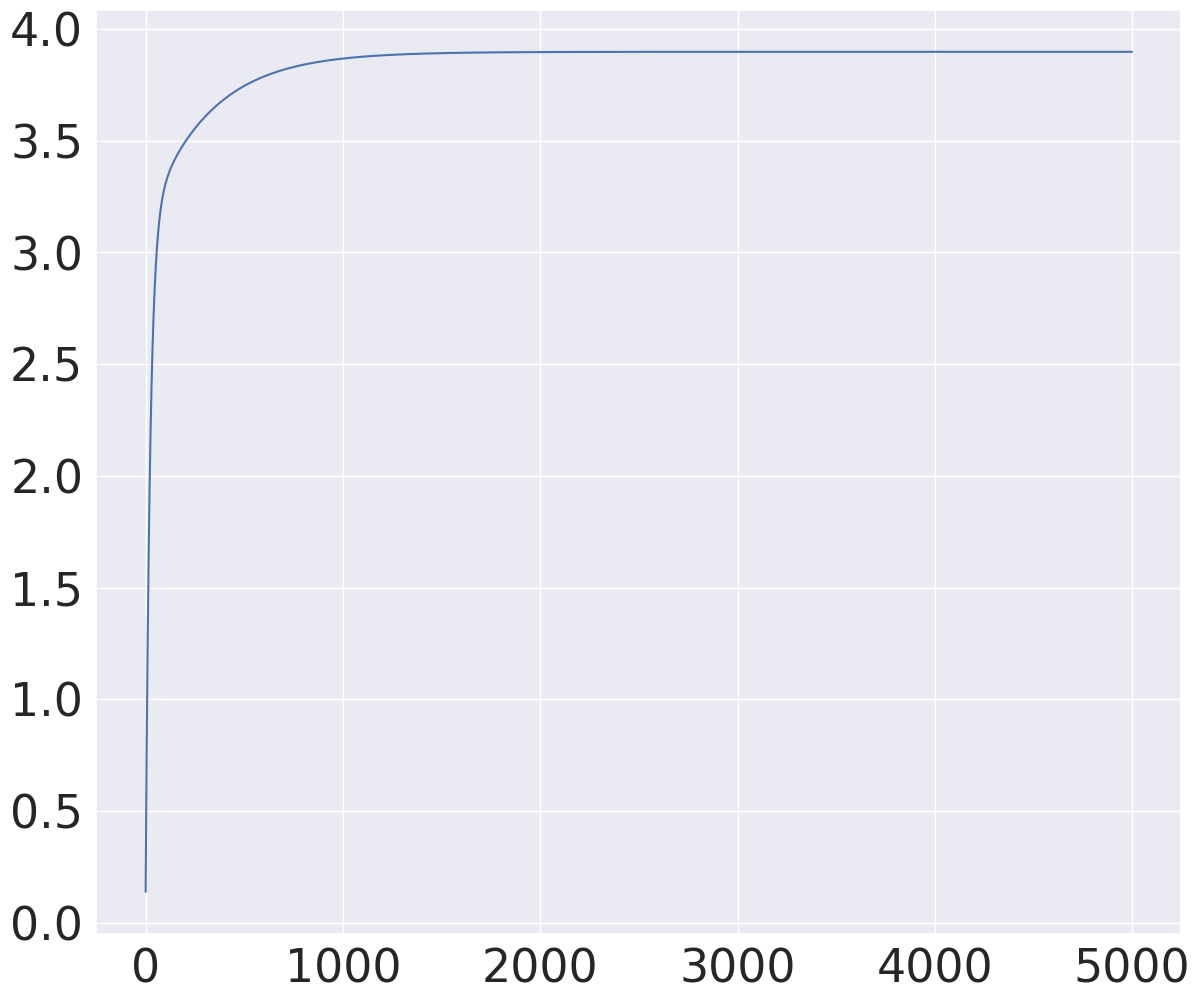

In [36]:
plt.figure(figsize=(14,12))
plt.plot(thetaList0);

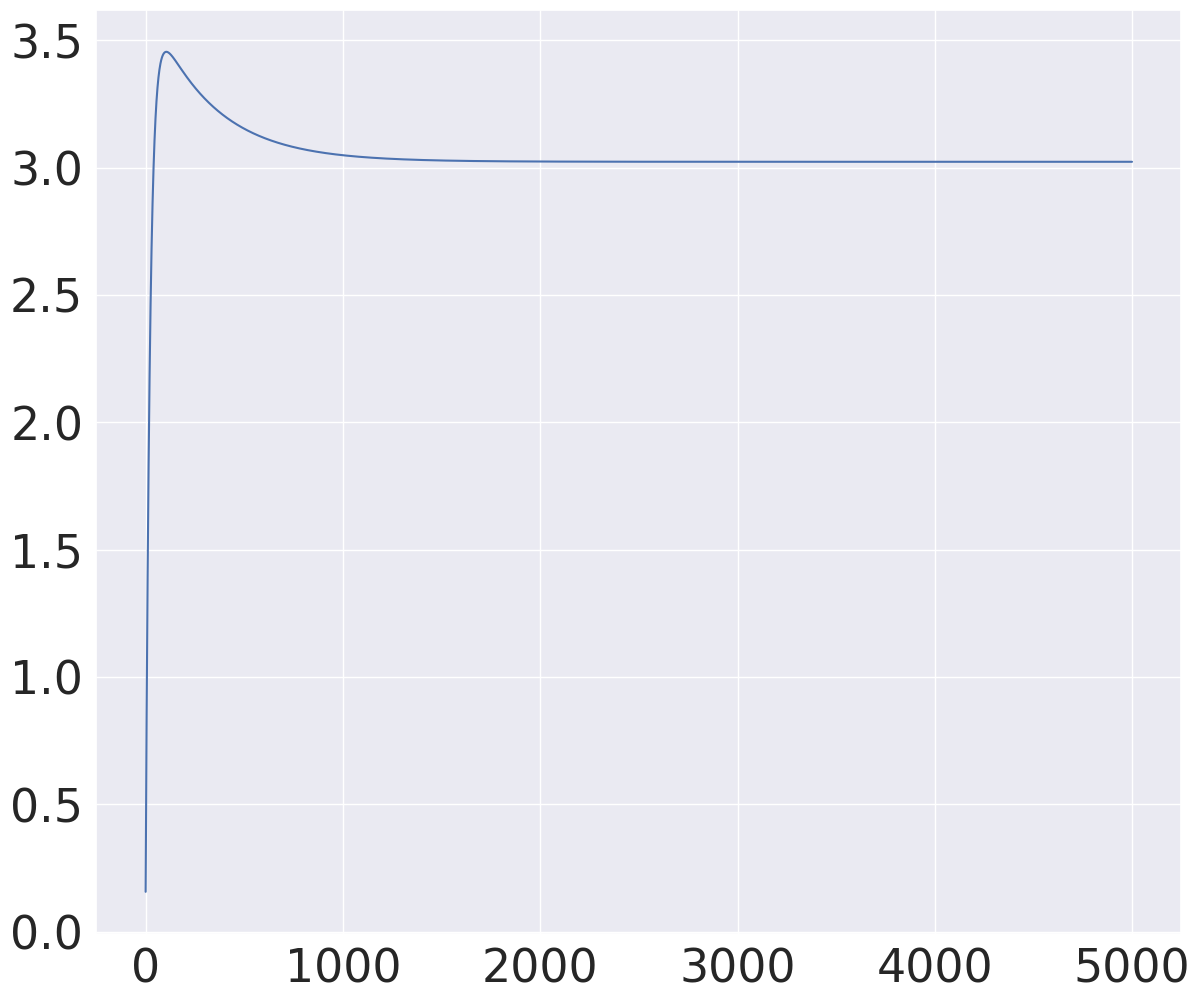

In [37]:
plt.figure(figsize=(14,12))
plt.plot(thetaList1);

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Descente de gradient $\eta=0.02 ;\eta=0.1 ;\eta=0.5 $ itterations 1000</div></b>

In [38]:
y_new = 4 + 3 * X_new + np.random.randn(5, 1)

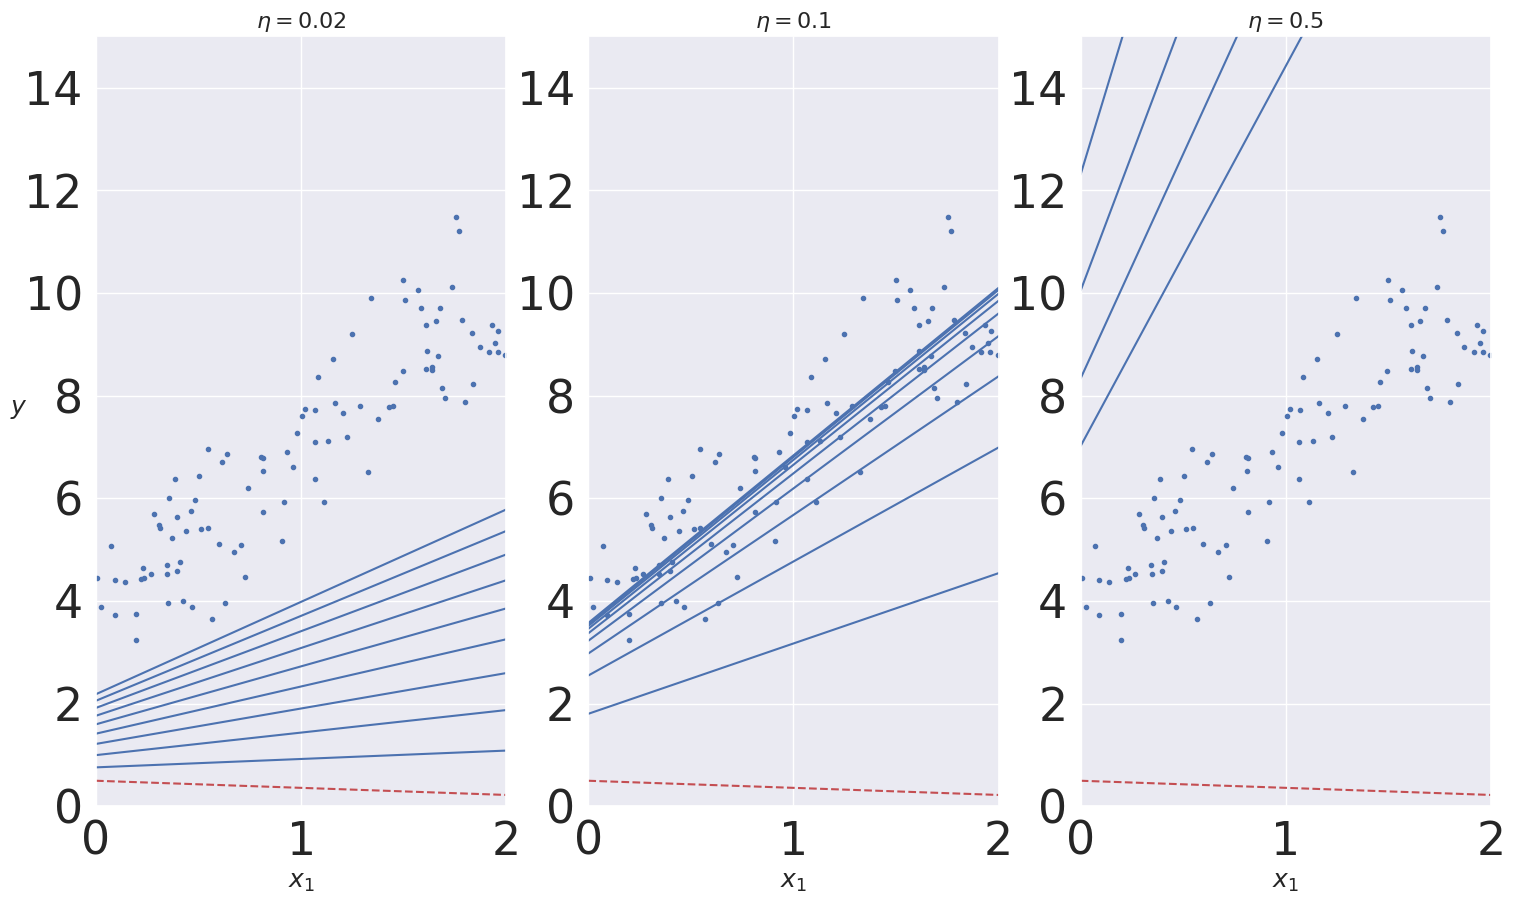

In [39]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    #plt.figure(figsize=(14,12))
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(18,10))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()